___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [38]:
import tensorflow as tf

tf.__version__

'2.12.0'

In [39]:
df = pd.read_csv('Churn_Modelling.csv')

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [40]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [41]:
df.shape

(10000, 14)

In [42]:
drop_features = ['RowNumber','CustomerId','Surname']
df.drop(columns=drop_features,inplace=True)
df.shape

(10000, 11)

In [43]:
df.drop_duplicates(inplace=True)

In [44]:
df.isna().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [46]:
df.describe().T
# std> mean yok.

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


Exited
0    7963
1    2037
Name: count, dtype: int64

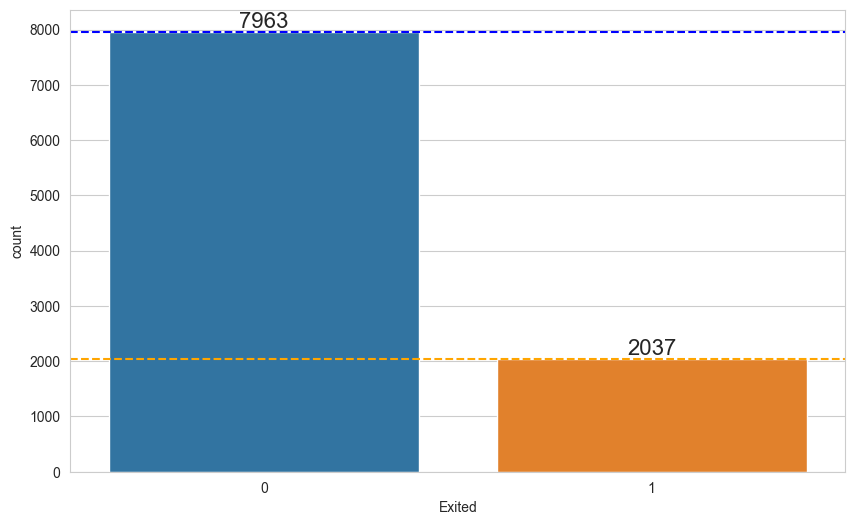

In [47]:
display(df.Exited.value_counts())
ax = sns.countplot(x=df["Exited"])
ax.bar_label(ax.containers[0], size=16)
plt.axhline(y=df.Exited.value_counts()[1], color='orange', linestyle='--')
plt.axhline(y=df.Exited.value_counts()[0], color='blue', linestyle='--');

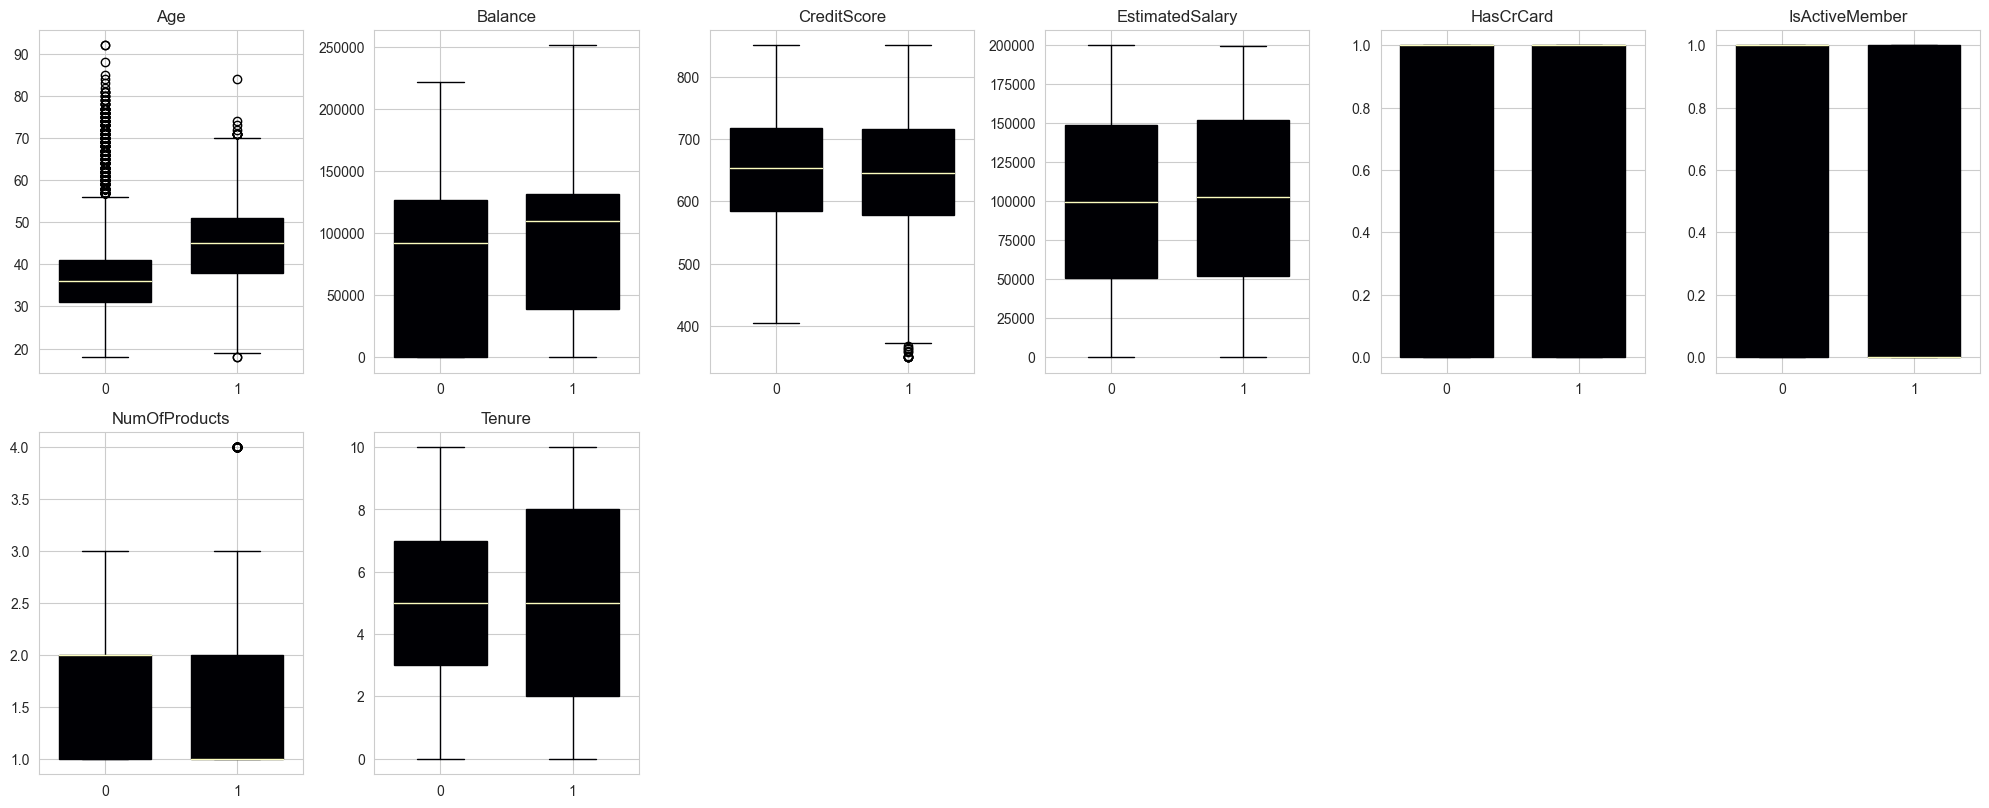

In [48]:
df.plot(kind="box",
        by="Exited", 
        layout=(5, 6), 
        subplots=True, 
        widths=0.7, 
        figsize=(20,20), 
        cmap="magma", 
        patch_artist=True)
plt.tight_layout();


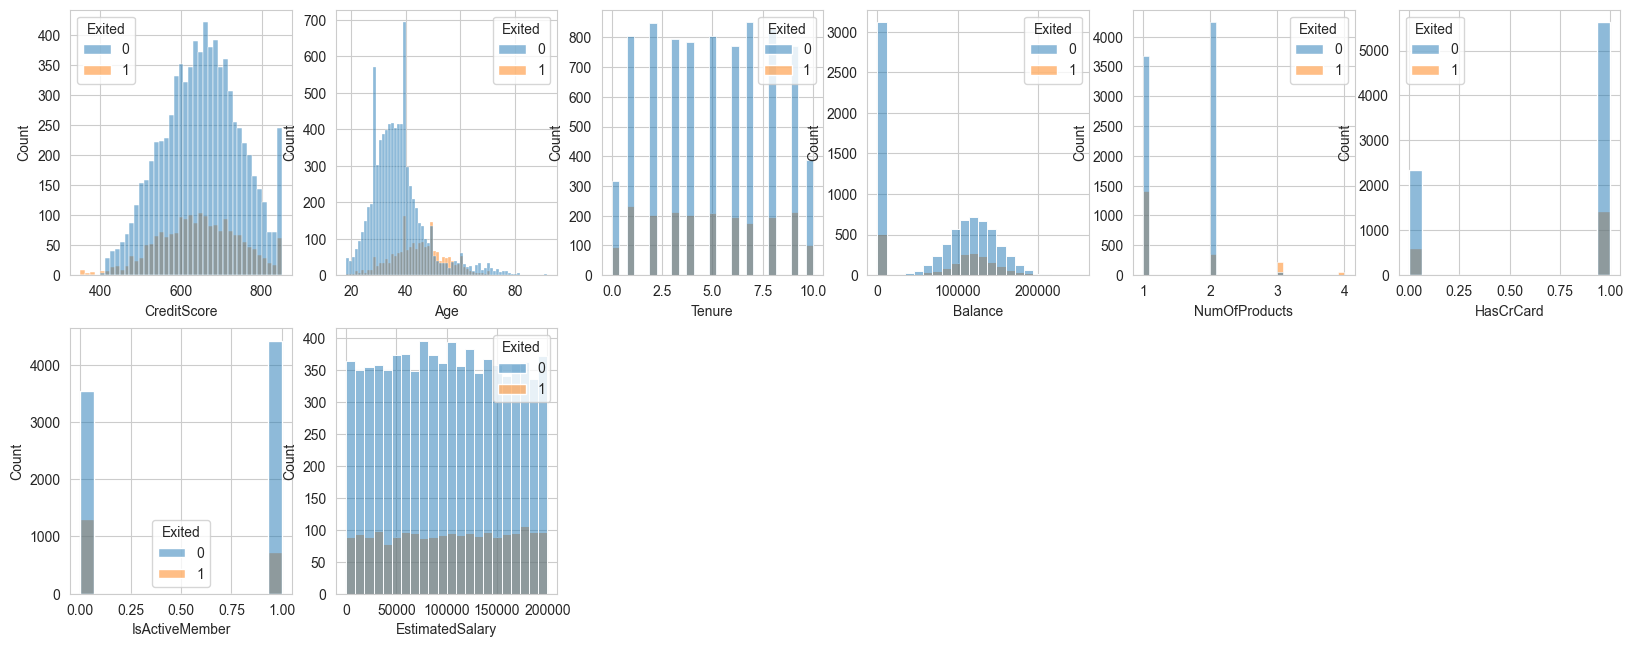

In [49]:
plt.figure(figsize=(20, 20))
for idx, col in enumerate(df.select_dtypes(include='number').columns[:-1]):
    plt.subplot(5, 6, idx+1)
    sns.histplot(data=df, x=col, hue='Exited')
# cok ic ice gecmis featurelari ilk basta da eleyebiliriz.

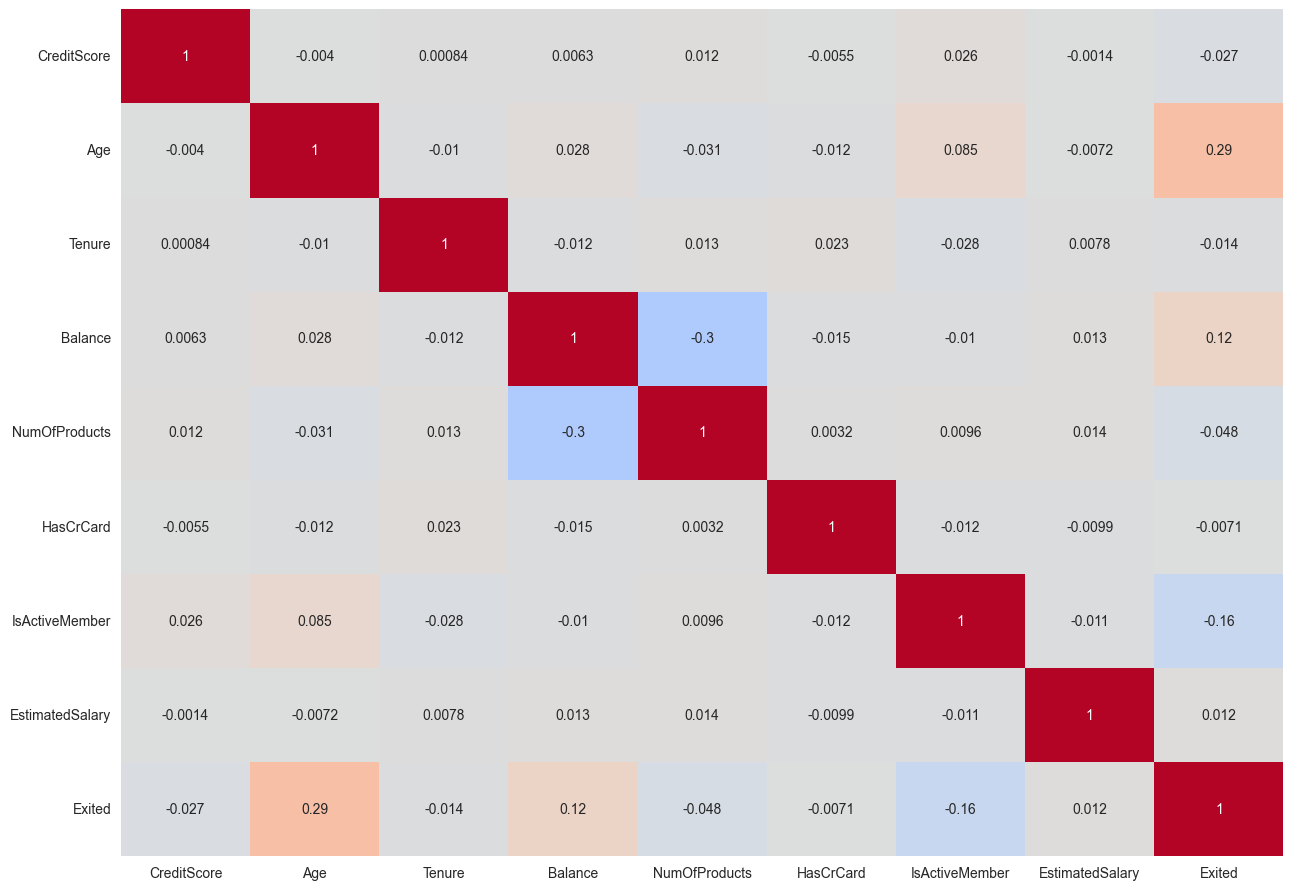

In [50]:
plt.figure(figsize=(15, 11))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm", cbar=False)
plt.show()

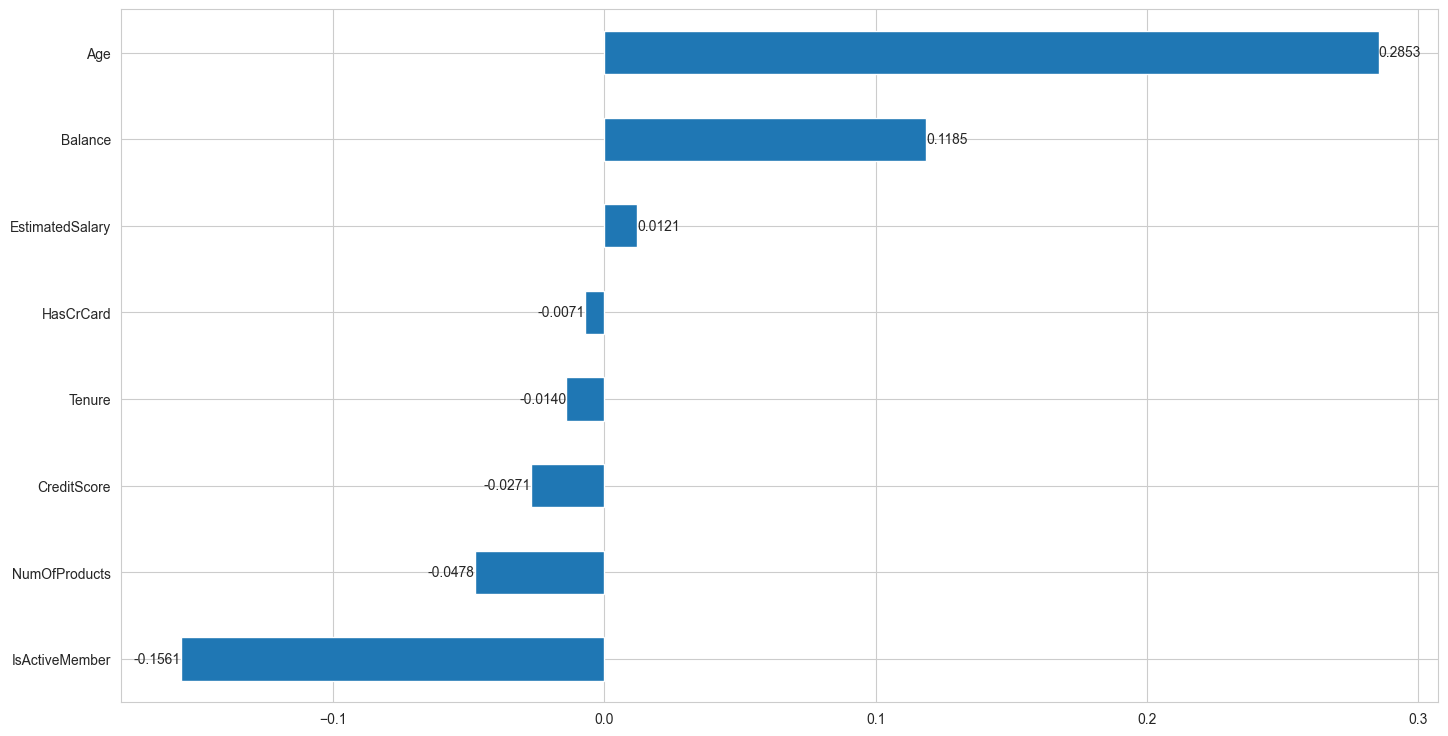

In [51]:
plt.figure(figsize=(17, 9))
ax = df.corr(numeric_only=True)["Exited"].sort_values().drop("Exited").plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.4f")
plt.show()

In [52]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [53]:
for feature in df.select_dtypes("object").columns:
    print(feature, df[feature].nunique())
               
# Kategorik featureların unique gözlem sayılarını tespit ediyoruz.

Geography 3
Gender 2


# Preprocessing of Data
- Train | Test Split, Scalling

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [55]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [56]:
seed = 13

In [57]:
X_train1, X_test, y_train1, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=seed 
)

# classların dağılımının oranını göz önünde bulundurarak bu train datasını ve test datasını ayırdık.

X_train, X_val, y_train, y_val = train_test_split(
    X_train1, y_train1, stratify=y_train1, test_size=0.1, random_state=seed 
)

# classların dağılımının oranını göz önünde bulundurarak bu train datasını ve validation datasını ayırdık.

In [58]:
scaler = MinMaxScaler()
# scaler = RobustScaler()

In [59]:
cat = X.select_dtypes("object").columns
cat

Index(['Geography', 'Gender'], dtype='object')

In [60]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', 
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), 
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")

In [62]:
X_train = column_trans.fit_transform(X_train)
X_val = column_trans.transform(X_val)
X_test = column_trans.transform(X_test)

In [65]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
X_train.shape

(8100, 10)

In [68]:
X_val.shape

(900, 10)

In [69]:
X_test.shape

(1000, 10)

## without class_weigth

### Create The Model

In [74]:
tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))


model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])



In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                396       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,243
Trainable params: 1,243
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(10, 36) dtype=float32, numpy=
 array([[ 0.05195194, -0.13018546,  0.35765693, -0.16823573, -0.06114736,
         -0.24131233, -0.03257829, -0.05276281, -0.03757858,  0.11293837,
         -0.23015444, -0.06687552, -0.19598688,  0.21633455,  0.13653004,
          0.03502646, -0.07469815,  0.23324868,  0.16863826, -0.3342321 ,
         -0.225698  ,  0.1311836 , -0.17600384, -0.2602552 , -0.25020275,
          0.1299639 ,  0.00454652, -0.22615978,  0.28712192,  0.29519084,
          0.21065918, -0.25254208,  0.03668541,  0.2132251 , -0.35445243,
          0.11724225],
        [ 0.09207362, -0.06801593, -0.25382042, -0.2722333 , -0.02078408,
          0.2959725 , -0.27772993, -0.14905564, -0.15152924,  0.19355652,
          0.34028146,  0.13678974,  0.22892949,  0.07291728,  0.2109141 ,
         -0.25820473,  0.09050542, -0.08296636,  0.03284058, -0.10218373,
          0.15064654,  0.35134986,  0.10005707, -0.16512987, -0.10694233,
         -0.01235372,

In [75]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [76]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/600
254/254 [==============================] - 3s 5ms/step - loss: 0.5226 - accuracy: 0.7793 - val_loss: 0.4744 - val_accuracy: 0.7967
Epoch 2/600
254/254 [==============================] - 1s 3ms/step - loss: 0.4553 - accuracy: 0.8079 - val_loss: 0.4429 - val_accuracy: 0.8122
Epoch 3/600
254/254 [==============================] - 1s 3ms/step - loss: 0.4307 - accuracy: 0.8151 - val_loss: 0.4185 - val_accuracy: 0.8211
Epoch 4/600
254/254 [==============================] - 1s 4ms/step - loss: 0.4142 - accuracy: 0.8201 - val_loss: 0.4117 - val_accuracy: 0.8222
Epoch 5/600
254/254 [==============================] - 1s 6ms/step - loss: 0.3984 - accuracy: 0.8289 - val_loss: 0.3847 - val_accuracy: 0.8356
Epoch 6/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3846 - accuracy: 0.8347 - val_loss: 0.3657 - val_accuracy: 0.8422
Epoch 7/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3725 - accuracy: 0.8423 - val_loss: 0.3588 - val_accuracy: 0.8433

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

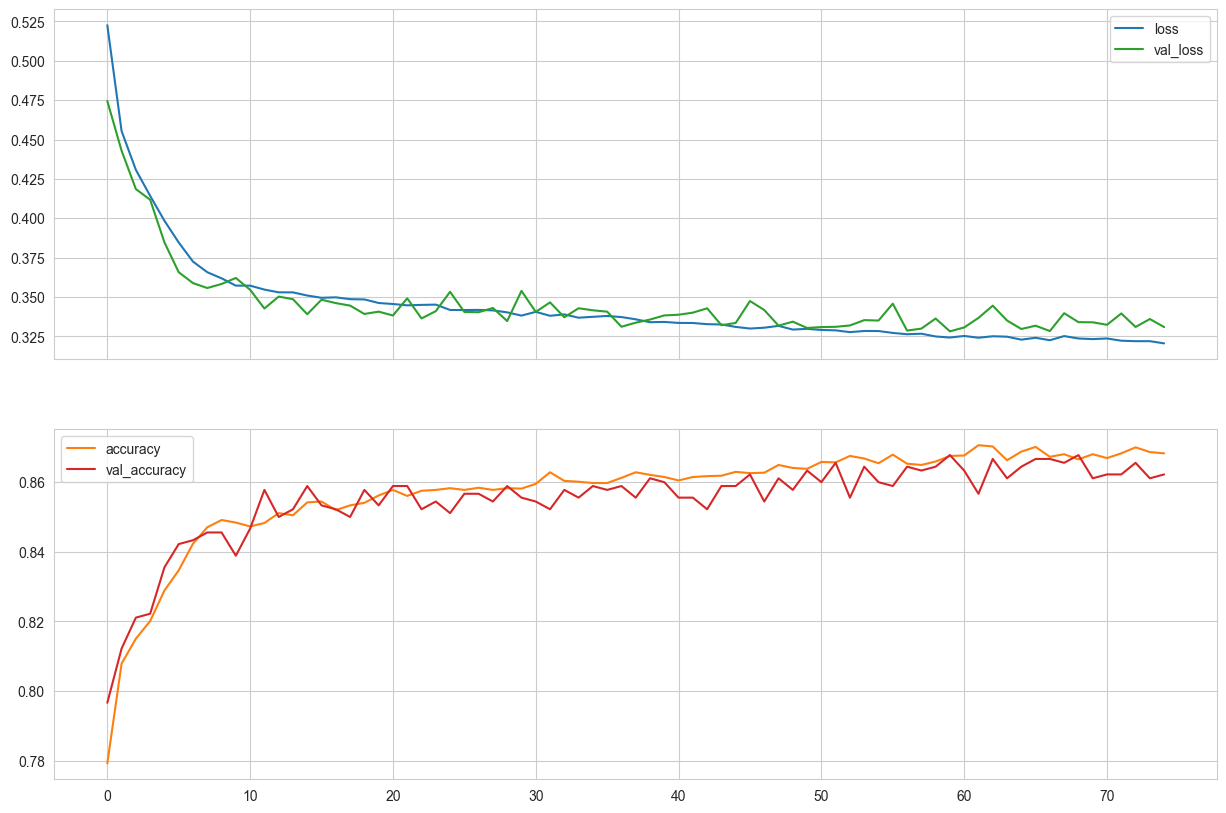

In [77]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [78]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3742450475692749
accuracy :  0.8539999723434448


In [79]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[769  27]
 [119  85]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       796
           1       0.76      0.42      0.54       204

    accuracy                           0.85      1000
   macro avg       0.81      0.69      0.73      1000
weighted avg       0.84      0.85      0.84      1000



32/32 [==============================] - 0s 3ms/step


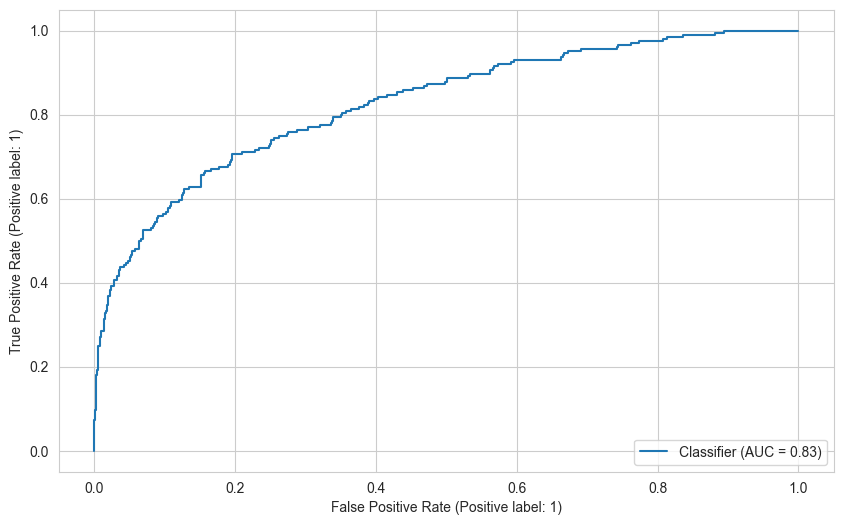

In [80]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [81]:
roc_auc_score(y_test, y_pred_proba)

0.8256047393831906

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [89]:
tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))


model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])



In [90]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 36)                396       
                                                                 
 dense_13 (Dense)            (None, 18)                666       
                                                                 
 dense_14 (Dense)            (None, 9)                 171       
                                                                 
 dense_15 (Dense)            (None, 1)                 10        
                                                                 
Total params: 1,243
Trainable params: 1,243
Non-trainable params: 0
_________________________________________________________________


In [91]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [97]:
from sklearn.utils.class_weight import compute_class_weight
# Compute the class weights
#class_weights = compute_class_weight(class_weight='balanced', classes= np.unique(y_train), y = y_train)
class_weights = dict(zip(np.unique(y_train), compute_class_weight(class_weight='balanced', classes= np.unique(y_train), y = y_train))) 

# Print the class weights
print(class_weights)

{0: 0.627906976744186, 1: 2.4545454545454546}


In [98]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights
)

Epoch 1/600
254/254 [==============================] - 3s 6ms/step - loss: 0.6532 - accuracy: 0.5893 - val_loss: 0.6540 - val_accuracy: 0.6089
Epoch 2/600
254/254 [==============================] - 1s 3ms/step - loss: 0.5980 - accuracy: 0.6819 - val_loss: 0.5934 - val_accuracy: 0.6822
Epoch 3/600
254/254 [==============================] - 1s 3ms/step - loss: 0.5728 - accuracy: 0.7106 - val_loss: 0.5448 - val_accuracy: 0.7322
Epoch 4/600
254/254 [==============================] - 1s 3ms/step - loss: 0.5488 - accuracy: 0.7322 - val_loss: 0.6251 - val_accuracy: 0.6811
Epoch 5/600
254/254 [==============================] - 1s 4ms/step - loss: 0.5281 - accuracy: 0.7496 - val_loss: 0.5787 - val_accuracy: 0.7178
Epoch 6/600
254/254 [==============================] - 1s 3ms/step - loss: 0.5147 - accuracy: 0.7556 - val_loss: 0.5097 - val_accuracy: 0.7444
Epoch 7/600
254/254 [==============================] - 1s 3ms/step - loss: 0.5066 - accuracy: 0.7560 - val_loss: 0.5288 - val_accuracy: 0.7356

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

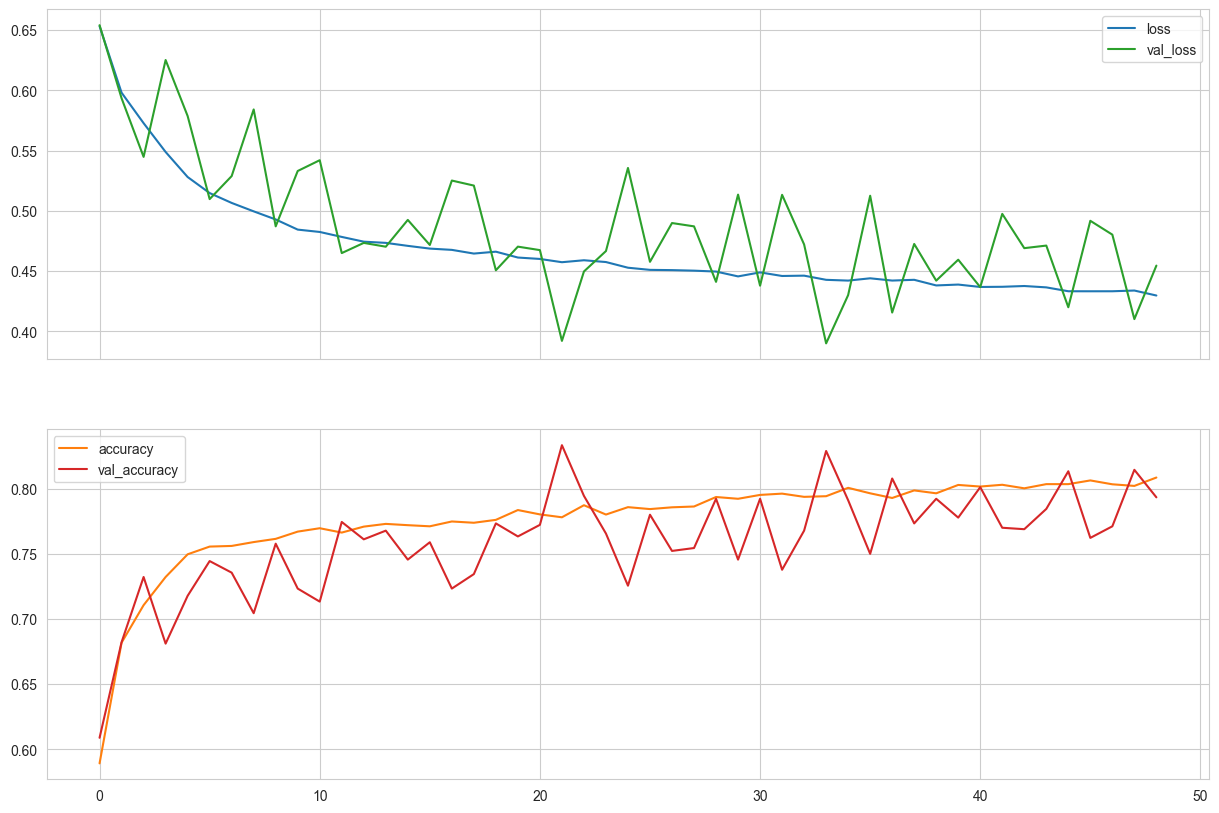

In [99]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [100]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.43342694640159607
accuracy :  0.796999990940094


In [101]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[665 131]
 [ 72 132]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       796
           1       0.50      0.65      0.57       204

    accuracy                           0.80      1000
   macro avg       0.70      0.74      0.72      1000
weighted avg       0.82      0.80      0.81      1000



32/32 [==============================] - 0s 2ms/step


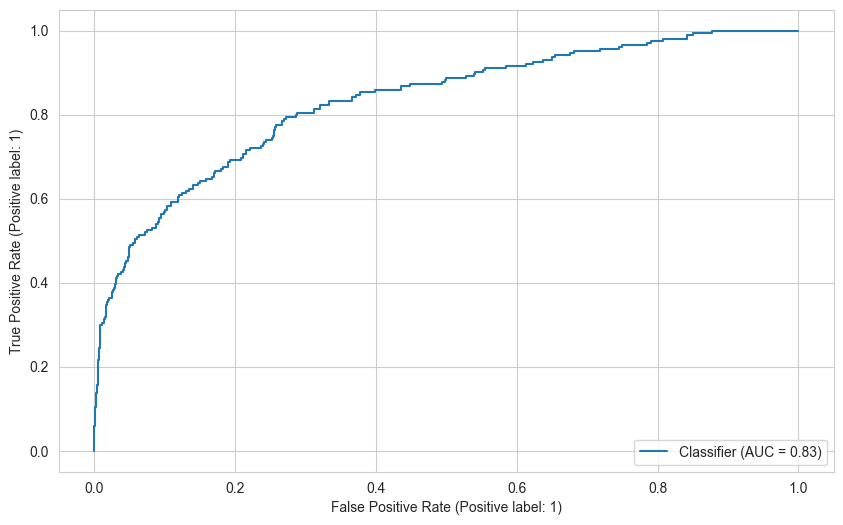

In [102]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [103]:
roc_auc_score(y_test, y_pred_proba)

0.8305313331362696

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [104]:
from tensorflow.keras.optimizers import Adam

In [111]:
tf.keras.utils.set_random_seed(seed)


model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=  0.005)

# optimizer'ı compile'a string olarak verdiğimizde "adam" gibi ; bu default learning rate kullanacağım demektir bunu değiştirmek
# istiyorsak opt = Adam(learning_rate=  0.005) bu şekilde tanımlayıp içerisine istediğimiz lr oranını yazıp
# ardından compile satırına  bunu tanımlıyoruz :



model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [112]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [113]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop]
    #class_weight = class_weights
)

Epoch 1/600
254/254 [==============================] - 4s 5ms/step - loss: 0.4719 - accuracy: 0.8009 - val_loss: 0.4266 - val_accuracy: 0.8167
Epoch 2/600
254/254 [==============================] - 1s 4ms/step - loss: 0.4114 - accuracy: 0.8275 - val_loss: 0.3706 - val_accuracy: 0.8533
Epoch 3/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3827 - accuracy: 0.8421 - val_loss: 0.3622 - val_accuracy: 0.8533
Epoch 4/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3635 - accuracy: 0.8490 - val_loss: 0.3438 - val_accuracy: 0.8633
Epoch 5/600
254/254 [==============================] - 1s 5ms/step - loss: 0.3575 - accuracy: 0.8548 - val_loss: 0.3544 - val_accuracy: 0.8556
Epoch 6/600
254/254 [==============================] - 2s 7ms/step - loss: 0.3563 - accuracy: 0.8568 - val_loss: 0.3536 - val_accuracy: 0.8511
Epoch 7/600
254/254 [==============================] - 2s 8ms/step - loss: 0.3518 - accuracy: 0.8560 - val_loss: 0.3437 - val_accuracy: 0.8611

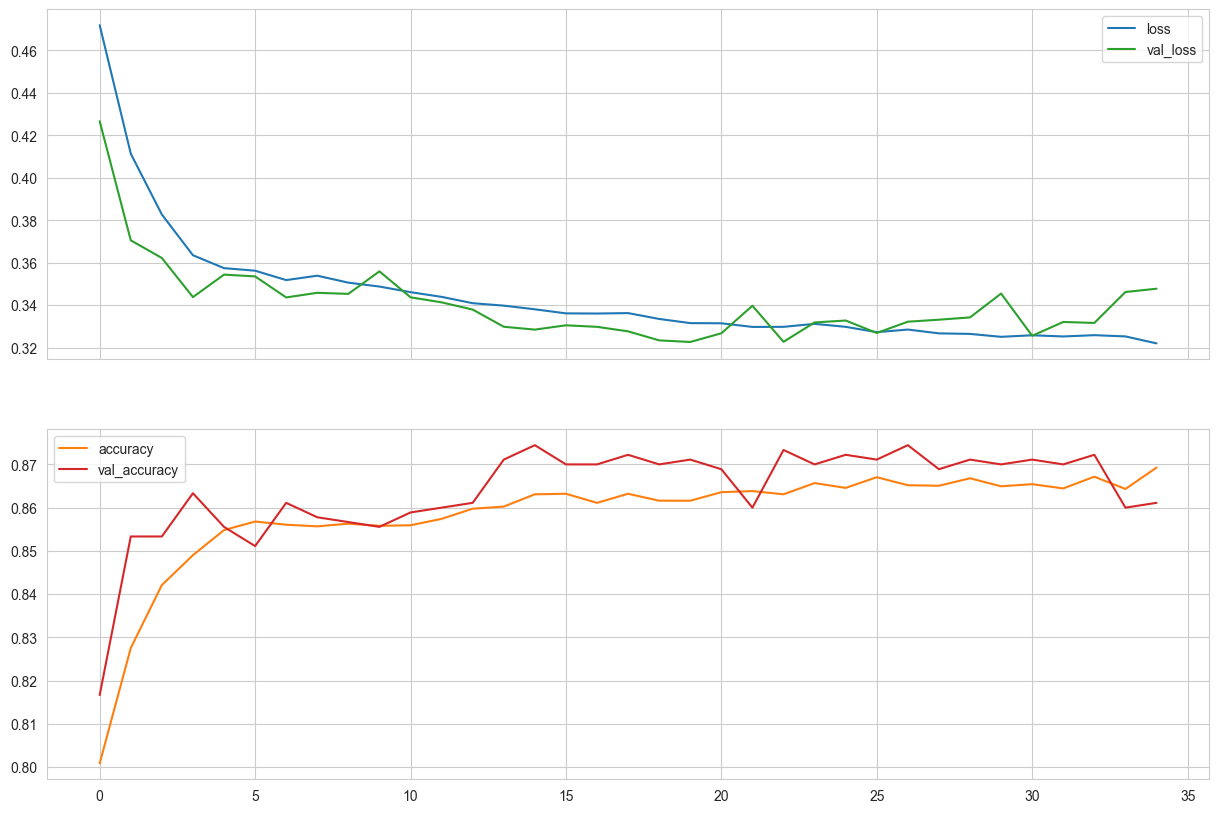

In [114]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [115]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.37155681848526
accuracy :  0.8489999771118164


In [116]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[750  46]
 [105  99]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       796
           1       0.68      0.49      0.57       204

    accuracy                           0.85      1000
   macro avg       0.78      0.71      0.74      1000
weighted avg       0.84      0.85      0.84      1000



### Add Dropout Layer

In [117]:
from tensorflow.keras.layers import Dropout

# ---> Dropout'ta bir regularization tekniğidir.
# Dropout, ağın belirli bir kısmını her İTERASYONDA rastgele seçerek "eğitim" sırasında devre dışı bırakır.Yukarıda şekilde 
# görüleceği gibi. biz modelimizin datayı ezberlemesini engellemek isteriz datadaki kuralları öğrenmesini datanın yapısını 
# anlamasını isteriz ama model datayı takıntı haline getirirse yani ezberlerse bu dropout yöntemi de kullanabileceğimiz bir 
# regularization tekniğidir.


# Dropout'u bir layer gibi modelimize ekleyeceğiz aşağıdaki örnekte olduğu gibi. 
# model.add(Dropout(0.2)) demek her iterasyonda nöronların MAX  %20 'si kapanacak demektir ve bu her iterasyonda RASTGELE olur

In [118]:
tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [119]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/600
254/254 [==============================] - 5s 5ms/step - loss: 0.6200 - accuracy: 0.7026 - val_loss: 0.5181 - val_accuracy: 0.7967
Epoch 2/600
254/254 [==============================] - 1s 4ms/step - loss: 0.5459 - accuracy: 0.7947 - val_loss: 0.4957 - val_accuracy: 0.7967
Epoch 3/600
254/254 [==============================] - 1s 4ms/step - loss: 0.5275 - accuracy: 0.7965 - val_loss: 0.4882 - val_accuracy: 0.7967
Epoch 4/600
254/254 [==============================] - 1s 5ms/step - loss: 0.5097 - accuracy: 0.7965 - val_loss: 0.4748 - val_accuracy: 0.7967
Epoch 5/600
254/254 [==============================] - 1s 4ms/step - loss: 0.5020 - accuracy: 0.7972 - val_loss: 0.4762 - val_accuracy: 0.7967
Epoch 6/600
254/254 [==============================] - 1s 4ms/step - loss: 0.4908 - accuracy: 0.7973 - val_loss: 0.4688 - val_accuracy: 0.7967
Epoch 7/600
254/254 [==============================] - 1s 4ms/step - loss: 0.4865 - accuracy: 0.7973 - val_loss: 0.4600 - val_accuracy: 0.7967

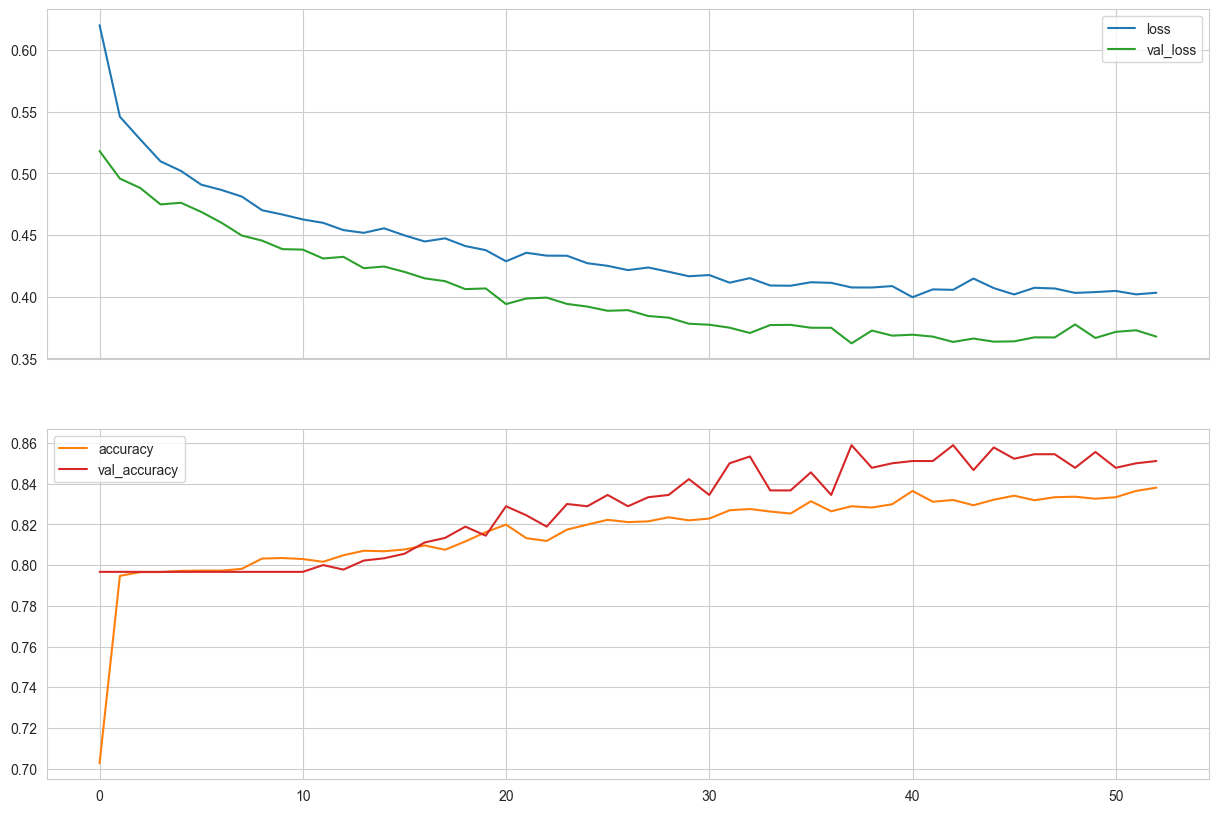

In [120]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [121]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3909187614917755
accuracy :  0.8460000157356262


In [123]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred_train = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

32/32 [==============================] - 0s 2ms/step
[[773  23]
 [131  73]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.76      0.36      0.49       204

    accuracy                           0.85      1000
   macro avg       0.81      0.66      0.70      1000
weighted avg       0.84      0.85      0.82      1000

254/254 [==============================] - 1s 2ms/step
[[6320  130]
 [1030  620]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6450
           1       0.83      0.38      0.52      1650

    accuracy                           0.86      8100
   macro avg       0.84      0.68      0.72      8100
weighted avg       0.85      0.86      0.83      8100



# L1 and L2 Regularizations(Weight Decay)

In [124]:
from tensorflow.keras.regularizers import l1, l2, L1L2

In [125]:
tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", 
                kernel_regularizer=L1L2(l1=1e-3, l2=1e-3),
                bias_regularizer=l2(1e-4), 
                activity_regularizer=l1(1e-5), 
                input_dim=X_train.shape[1]))

model.add(Dense(18, activation="relu", 
                kernel_regularizer=L1L2(l1=1e-3, l2=1e-3), 
                bias_regularizer=l2(1e-4), 
                activity_regularizer=l1(1e-5)))

model.add(Dense(9, activation="relu", 
                kernel_regularizer=L1L2(l1=1e-3, l2=1e-3), 
                bias_regularizer=l2(1e-4), 
                activity_regularizer=l1(1e-5)))


model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [126]:
model.fit(x=X_train,
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size=32, 
          epochs=600,
          callbacks=[early_stop],
          verbose=1
)

Epoch 1/600
254/254 [==============================] - 4s 5ms/step - loss: 0.6894 - accuracy: 0.7791 - val_loss: 0.5737 - val_accuracy: 0.7967
Epoch 2/600
254/254 [==============================] - 1s 3ms/step - loss: 0.5447 - accuracy: 0.7963 - val_loss: 0.5208 - val_accuracy: 0.7967
Epoch 3/600
254/254 [==============================] - 1s 3ms/step - loss: 0.5133 - accuracy: 0.7963 - val_loss: 0.5033 - val_accuracy: 0.7967
Epoch 4/600
254/254 [==============================] - 1s 3ms/step - loss: 0.4986 - accuracy: 0.7963 - val_loss: 0.4921 - val_accuracy: 0.7967
Epoch 5/600
254/254 [==============================] - 1s 4ms/step - loss: 0.4896 - accuracy: 0.7963 - val_loss: 0.4858 - val_accuracy: 0.7967
Epoch 6/600
254/254 [==============================] - 1s 3ms/step - loss: 0.4831 - accuracy: 0.7963 - val_loss: 0.4856 - val_accuracy: 0.7967
Epoch 7/600
254/254 [==============================] - 2s 6ms/step - loss: 0.4792 - accuracy: 0.7963 - val_loss: 0.4777 - val_accuracy: 0.7967

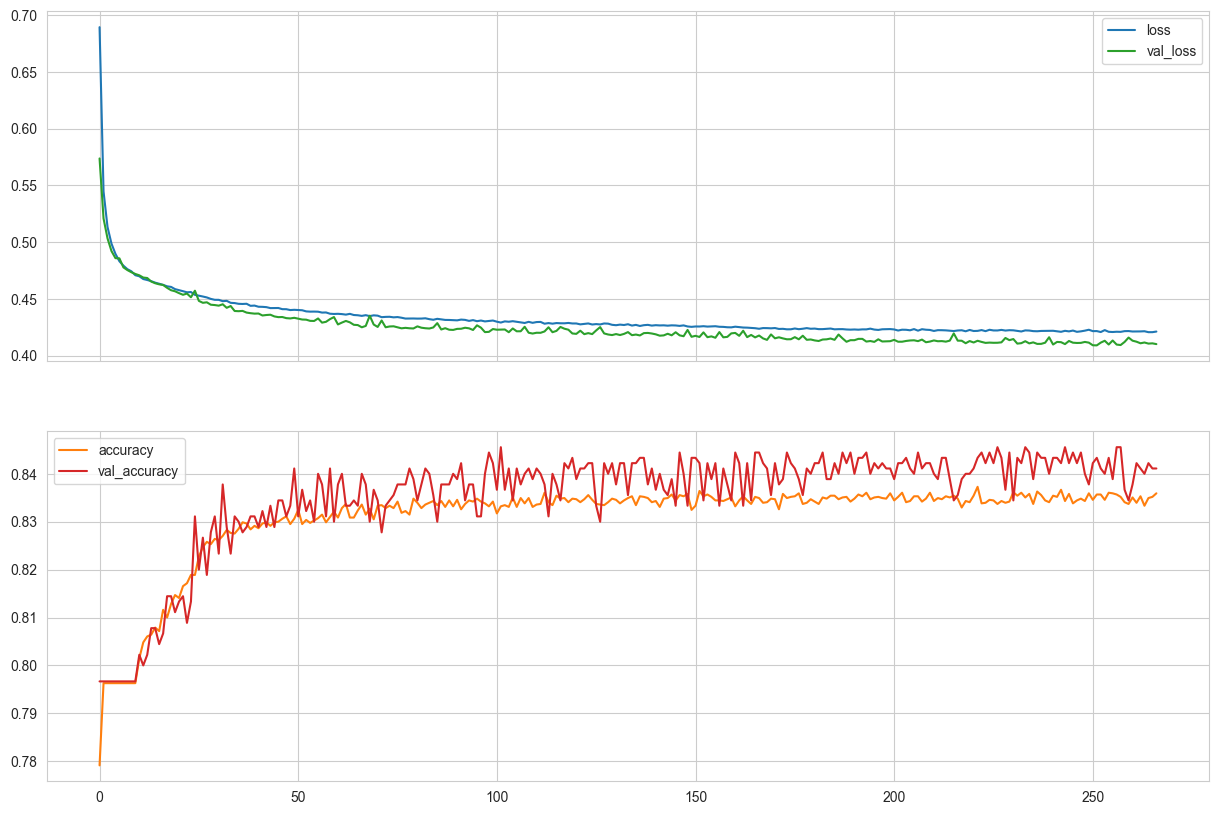

In [127]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"], ["accuracy","val_accuracy"]], layout=(2,1), figsize=(15,10))
plt.show()

In [128]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.43181753158569336
accuracy:  0.8320000171661377


In [129]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[776  20]
 [148  56]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       796
           1       0.74      0.27      0.40       204

    accuracy                           0.83      1000
   macro avg       0.79      0.62      0.65      1000
weighted avg       0.82      0.83      0.80      1000



32/32 [==============================] - 0s 2ms/step


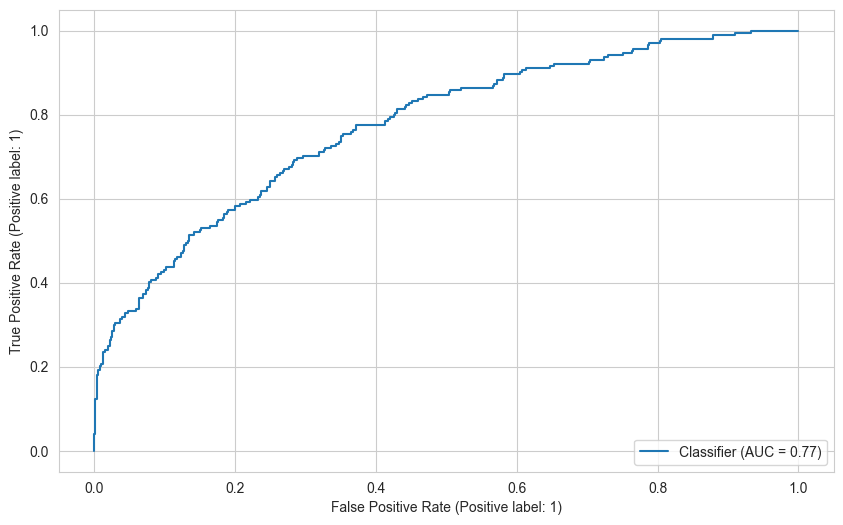

In [130]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
# 0 ve 1 klasini modelimiz yuzde kac ayirabiliyor?

In [131]:
roc_auc_score(y_test, y_pred_proba)

0.7737892895851808

### Add Early Stop

#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## Optuna

In [137]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [132]:
import optuna

## GridSearch'i de aynı cv'da olduğu gibi kullanabilriz burada ama optunayı kullanacağız bunun nedenleri
## ---> sklearn GPU'yu kullanamaz , gridsearch verdiğimiz uzaydaki bütün kombinasyonları deniyor DL'de çok fazla hyperparametre
# var bunun için GPU'yu kullanabileceğimiz bir optimization yöntemi olan optuna'yı kullanıyoruz.

# optunayı Ml algoritmalarında da kullanabilirsiniz.

In [133]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [138]:
trial_metric = "Accuracy"
batch_size = 64

# batch_size = 64 model biraz daha hızlı eğitilsin diye batch_size'ı 32'den 64'e çıkardık

def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 64, 128) # ilk layerda kaç tane nöron olsun 64'ten 128'e kadar dene diyoruz
    n_units2 = trial.suggest_int("n_units2", 16, 64)  # ama dikkat hepsini denemeyecek en iyiye doğru bir yönelimi olacak. 
    n_units3 = trial.suggest_int("n_units3", 16, 64)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam]) # optimizer olarak buradakileri dene
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1) 
    regularizer1 = trial.suggest_loguniform("regularizer1", 1e-5, 1e-3)
    regularizer2 = trial.suggest_loguniform("regularizer2", 1e-5, 1e-3)
    dropout = trial.suggest_categorical("dropout",[0, .3, .5])
    
    # deneyeceğimiz hyperparametrelerin uzayını belirledik.
    # modeli aynı seed'de çalıştırarak

    tf.keras.utils.set_random_seed(seed)
    model = Sequential()
    model.add(Dense(n_units1,  
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2), 
                    input_dim=X_train.shape[1],))
    model.add(Dropout(dropout))
    model.add(Dense(n_units2, 
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(n_units3,
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2),
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))
   



    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric]
    )
    
    
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5) # mimarinin içerisinde direk veremediğimiz bir hyperparametre-->(class_weight)
    w1 = trial.suggest_loguniform("w1", 0.01, 2) # daha var bunu fit içerisinde belirtebiliyoruz ondan dolayı burada tanımladık
                                                 # denenmesi için.
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=700,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    return model.evaluate(X_test, y_test, verbose=0)[1]

In [139]:
study = optuna.create_study(direction="maximize") # trial_metric = "Accuracy" olduğundan bunu maximize etmek istiyoruz.
study.optimize(objective, n_trials=15) # 15 trials denenecek istersek daha fazla da yazabiliriz.optimize edeceği :def objective
display(study.best_params)

[I 2023-05-18 00:17:21,486] A new study created in memory with name: no-name-a503bbef-1658-49c9-b7f8-ccb800395931


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-05-18 00:17:31,504] Trial 0 finished with value: 0.7960000038146973 and parameters: {'n_units1': 85, 'n_units2': 40, 'n_units3': 52, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.00013558524244960916, 'regularizer1': 6.87607370648184e-05, 'regularizer2': 6.695367329645237e-05, 'dropout': 0.5, 'w0': 1.3384823606614402, 'w1': 0.06961240348742696}. Best is trial 0 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 36.
Epoch 51: early stopping


[I 2023-05-18 00:17:54,688] Trial 1 finished with value: 0.7960000038146973 and parameters: {'n_units1': 105, 'n_units2': 48, 'n_units3': 47, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.002487144487193463, 'regularizer1': 2.7208714184318517e-05, 'regularizer2': 0.00041551551622425614, 'dropout': 0.5, 'w0': 2.624717185526111, 'w1': 0.09805607562533009}. Best is trial 0 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 6.
Epoch 21: early stopping


[I 2023-05-18 00:18:07,460] Trial 2 finished with value: 0.7960000038146973 and parameters: {'n_units1': 84, 'n_units2': 62, 'n_units3': 50, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 2.8655995836784344e-05, 'regularizer1': 0.0006135213925983767, 'regularizer2': 0.00012225820514344957, 'dropout': 0.5, 'w0': 0.5065476080327366, 'w1': 0.034254131597285006}. Best is trial 0 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 344.
Epoch 359: early stopping


[I 2023-05-18 00:20:25,067] Trial 3 finished with value: 0.8460000157356262 and parameters: {'n_units1': 68, 'n_units2': 44, 'n_units3': 24, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 6.687679978465162e-05, 'regularizer1': 2.493140300544894e-05, 'regularizer2': 0.0002556900752826469, 'dropout': 0.3, 'w0': 1.6866281852677782, 'w1': 1.2713194319751155}. Best is trial 3 with value: 0.8460000157356262.


Restoring model weights from the end of the best epoch: 108.
Epoch 123: early stopping


[I 2023-05-18 00:21:05,779] Trial 4 finished with value: 0.8519999980926514 and parameters: {'n_units1': 89, 'n_units2': 17, 'n_units3': 52, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00014984468461005031, 'regularizer1': 0.00010049266980339828, 'regularizer2': 1.7755301674569957e-05, 'dropout': 0, 'w0': 1.2251777628082328, 'w1': 0.6182471000374223}. Best is trial 4 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 11.
Epoch 26: early stopping


[I 2023-05-18 00:21:18,223] Trial 5 finished with value: 0.7960000038146973 and parameters: {'n_units1': 128, 'n_units2': 39, 'n_units3': 64, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0005369114762828098, 'regularizer1': 0.00043019269659395177, 'regularizer2': 2.675975624694985e-05, 'dropout': 0.5, 'w0': 1.3122532680977452, 'w1': 0.021215299716344456}. Best is trial 4 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 36.
Epoch 51: early stopping


[I 2023-05-18 00:21:40,668] Trial 6 finished with value: 0.20399999618530273 and parameters: {'n_units1': 99, 'n_units2': 27, 'n_units3': 49, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 6.114339160507639e-05, 'regularizer1': 0.000965884200028834, 'regularizer2': 0.00013353006275080345, 'dropout': 0, 'w0': 0.07750038260292395, 'w1': 0.7040345182733622}. Best is trial 4 with value: 0.8519999980926514.
[I 2023-05-18 00:25:29,599] Trial 7 finished with value: 0.7960000038146973 and parameters: {'n_units1': 109, 'n_units2': 35, 'n_units3': 33, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 8.366835938770225e-05, 'regularizer1': 6.477057178701988e-05, 'regularizer2': 2.068076078031442e-05, 'dropout': 0, 'w0': 0.3243235501670231, 'w1': 0.3293708364097117}. Best is trial 4 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-05-18 00:25:39,356] Trial 8 finished with value: 0.7960000038146973 and parameters: {'n_units1': 83, 'n_units2': 48, 'n_units3': 22, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0005609248092315802, 'regularizer1': 3.155799901739592e-05, 'regularizer2': 0.00021863724715821166, 'dropout': 0, 'w0': 1.4996727268621803, 'w1': 0.018509036702926907}. Best is trial 4 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-05-18 00:25:50,295] Trial 9 finished with value: 0.7960000038146973 and parameters: {'n_units1': 87, 'n_units2': 18, 'n_units3': 63, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.00018020281557132588, 'regularizer1': 1.7702821621518526e-05, 'regularizer2': 0.00034643363454659083, 'dropout': 0.5, 'w0': 0.6942423140951224, 'w1': 0.0314591363622663}. Best is trial 4 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 9.
Epoch 24: early stopping


[I 2023-05-18 00:26:01,584] Trial 10 finished with value: 0.7960000038146973 and parameters: {'n_units1': 64, 'n_units2': 16, 'n_units3': 37, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.01758618704496092, 'regularizer1': 0.0002052372144514668, 'regularizer2': 1.1824739199072464e-05, 'dropout': 0.3, 'w0': 4.853673323227151, 'w1': 0.31321499334245306}. Best is trial 4 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-05-18 00:26:09,754] Trial 11 finished with value: 0.32499998807907104 and parameters: {'n_units1': 64, 'n_units2': 53, 'n_units3': 16, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 1.3164690656493249e-05, 'regularizer1': 0.00012591212437257257, 'regularizer2': 0.0009346204089413707, 'dropout': 0.3, 'w0': 0.0963339014466941, 'w1': 1.72714984359707}. Best is trial 4 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-05-18 00:26:18,416] Trial 12 finished with value: 0.20399999618530273 and parameters: {'n_units1': 76, 'n_units2': 29, 'n_units3': 27, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 1.9322224198434143e-05, 'regularizer1': 1.066559356670967e-05, 'regularizer2': 6.676419632984527e-05, 'dropout': 0.3, 'w0': 0.01930662702657958, 'w1': 1.6647172908165486}. Best is trial 4 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 44.
Epoch 59: early stopping


[I 2023-05-18 00:26:44,403] Trial 13 finished with value: 0.7960000038146973 and parameters: {'n_units1': 73, 'n_units2': 26, 'n_units3': 42, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0019043858177056996, 'regularizer1': 4.540087361172928e-05, 'regularizer2': 4.5827273436676744e-05, 'dropout': 0.3, 'w0': 4.850466661957261, 'w1': 0.7242179713602648}. Best is trial 4 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 36.
Epoch 51: early stopping


[I 2023-05-18 00:27:03,631] Trial 14 finished with value: 0.8379999995231628 and parameters: {'n_units1': 115, 'n_units2': 48, 'n_units3': 57, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0002760589286102527, 'regularizer1': 0.0001264398057089686, 'regularizer2': 3.463268558807714e-05, 'dropout': 0, 'w0': 0.7018817886705543, 'w1': 0.2270844840066647}. Best is trial 4 with value: 0.8519999980926514.


{'n_units1': 89,
 'n_units2': 17,
 'n_units3': 52,
 'optimizer': keras.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.00014984468461005031,
 'regularizer1': 0.00010049266980339828,
 'regularizer2': 1.7755301674569957e-05,
 'dropout': 0,
 'w0': 1.2251777628082328,
 'w1': 0.6182471000374223}

In [140]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, lreg1, lreg2, dropout_rate, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["regularizer1"],
    study.best_params["regularizer2"],
    study.best_params["dropout"],
    study.best_params["w0"],
    study.best_params["w1"],
)

tf.keras.utils.set_random_seed(seed)
model = Sequential()
model.add(Dense(unit1, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit2, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit3, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Accuracy"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=500,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/500
127/127 [==============================] - 5s 14ms/step - loss: 0.6313 - Accuracy: 0.7544 - val_loss: 0.5457 - val_Accuracy: 0.7967
Epoch 2/500
127/127 [==============================] - 1s 8ms/step - loss: 0.5394 - Accuracy: 0.7963 - val_loss: 0.5245 - val_Accuracy: 0.7967
Epoch 3/500
127/127 [==============================] - 1s 7ms/step - loss: 0.5276 - Accuracy: 0.7963 - val_loss: 0.5177 - val_Accuracy: 0.7967
Epoch 4/500
127/127 [==============================] - 1s 6ms/step - loss: 0.5198 - Accuracy: 0.7963 - val_loss: 0.5121 - val_Accuracy: 0.7967
Epoch 5/500
127/127 [==============================] - 1s 7ms/step - loss: 0.5133 - Accuracy: 0.7963 - val_loss: 0.5080 - val_Accuracy: 0.7967
Epoch 6/500
127/127 [==============================] - 0s 3ms/step - loss: 0.5079 - Accuracy: 0.7963 - val_loss: 0.5037 - val_Accuracy: 0.7967
Epoch 7/500
127/127 [==============================] - 1s 6ms/step - loss: 0.5032 - Accuracy: 0.7963 - val_loss: 0.4995 - val_Accuracy: 0.796

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [141]:
history = model.history.history

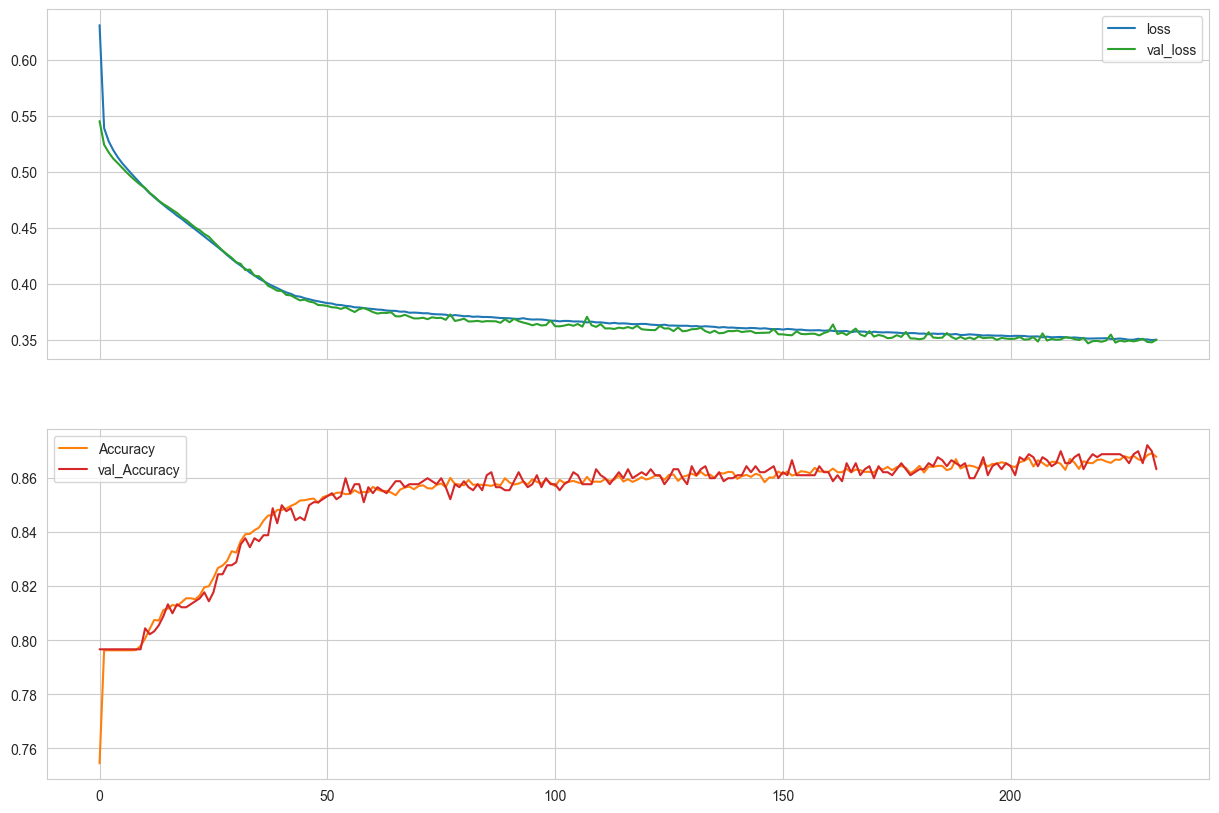

In [142]:
loss_df = pd.DataFrame(history)
loss_df.plot(subplots=[["loss","val_loss"],["Accuracy","val_Accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [143]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[760  36]
 [117  87]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.71      0.43      0.53       204

    accuracy                           0.85      1000
   macro avg       0.79      0.69      0.72      1000
weighted avg       0.83      0.85      0.83      1000



32/32 [==============================] - 0s 4ms/step


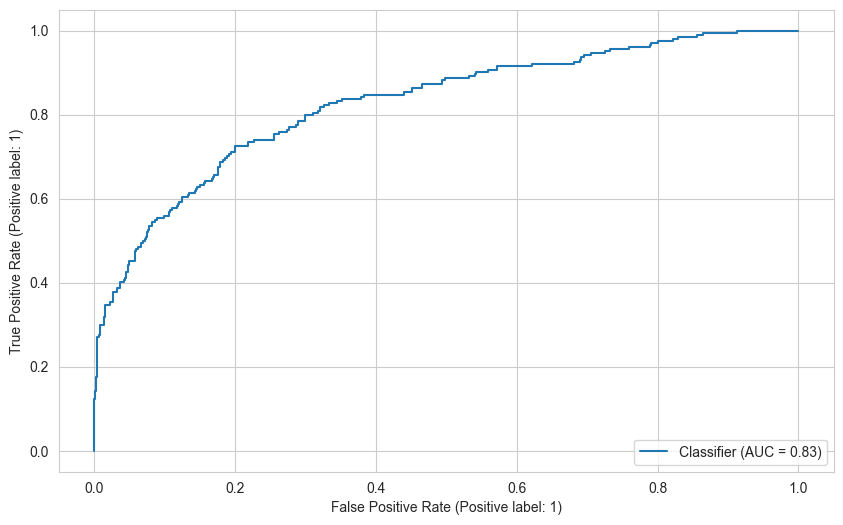

In [144]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [145]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3982921838760376
accuracy:  0.847000002861023


In [146]:
roc_auc_score(y_test, y_pred_proba)

0.8261220317272637

# Final Model and Model Deployment

In [147]:
tf.keras.utils.set_random_seed(seed)


model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=  0.005)

# optimizer'ı compile'a string olarak verdiğimizde "adam" gibi ; bu default learning rate kullanacağım demektir bunu değiştirmek
# istiyorsak opt = Adam(learning_rate=  0.005) bu şekilde tanımlayıp içerisine istediğimiz lr oranını yazıp
# ardından compile satırına  bunu tanımlıyoruz :



model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [148]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [149]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop]
    #class_weight = class_weights
)

Epoch 1/600
254/254 [==============================] - 3s 4ms/step - loss: 0.4719 - accuracy: 0.8009 - val_loss: 0.4266 - val_accuracy: 0.8167
Epoch 2/600
254/254 [==============================] - 1s 3ms/step - loss: 0.4114 - accuracy: 0.8275 - val_loss: 0.3706 - val_accuracy: 0.8533
Epoch 3/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3827 - accuracy: 0.8421 - val_loss: 0.3622 - val_accuracy: 0.8533
Epoch 4/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3635 - accuracy: 0.8490 - val_loss: 0.3438 - val_accuracy: 0.8633
Epoch 5/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3575 - accuracy: 0.8548 - val_loss: 0.3544 - val_accuracy: 0.8556
Epoch 6/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3563 - accuracy: 0.8568 - val_loss: 0.3536 - val_accuracy: 0.8511
Epoch 7/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3518 - accuracy: 0.8560 - val_loss: 0.3437 - val_accuracy: 0.8611

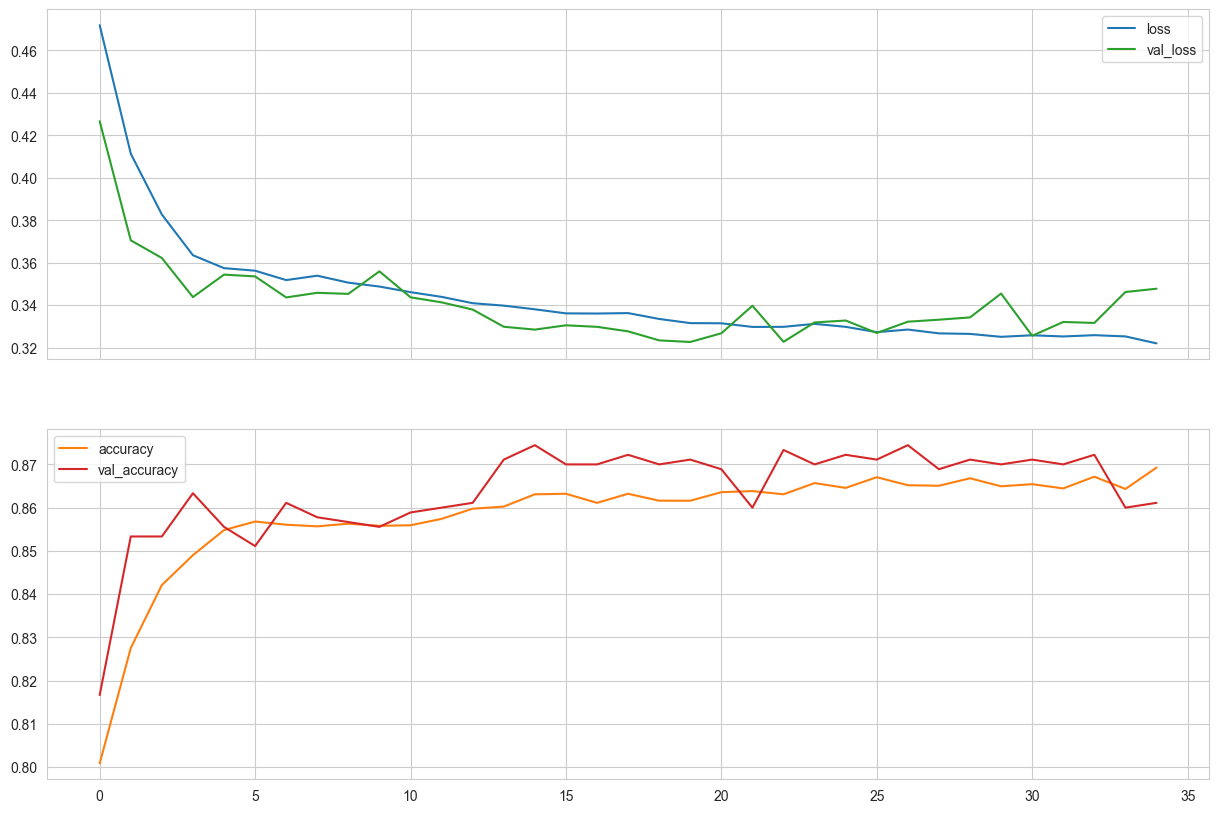

In [150]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [151]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.37155681848526
accuracy :  0.8489999771118164


In [152]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[750  46]
 [105  99]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       796
           1       0.68      0.49      0.57       204

    accuracy                           0.85      1000
   macro avg       0.78      0.71      0.74      1000
weighted avg       0.84      0.85      0.84      1000



32/32 [==============================] - 0s 4ms/step


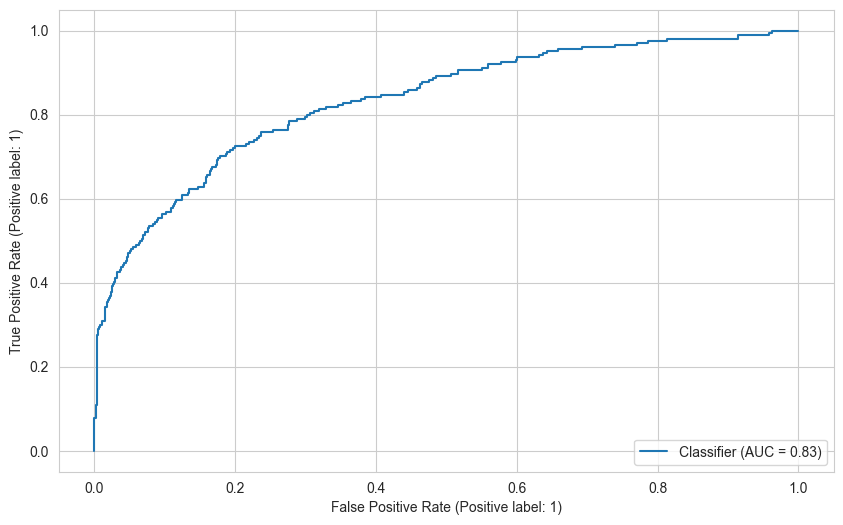

In [186]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
# 0 ve 1 klasini modelimiz yuzde kac ayirabiliyor?

In [153]:
model.save('churn.h5')

In [154]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [155]:
pickle.dump(column_trans, open("ord_encoder_churn", 'wb'))

## Prediction

In [156]:
from tensorflow.keras.models import load_model

In [157]:
model_churn = load_model('churn.h5')
scaler_churn = pickle.load(open("scaler_churn", "rb"))
trans_churn = pickle.load(open("ord_encoder_churn", "rb"))

In [162]:
single = df.drop('Exited', axis = 1).iloc[1:2, :]
single

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580


In [163]:
single = trans_churn.transform(single)
single = scaler_churn.transform(single)
single

array([[1.        , 0.        , 0.516     , 0.31081081, 0.1       ,
        0.33403148, 0.        , 0.        , 1.        , 0.56253704]])

In [164]:
(model_churn.predict(single) > 0.5).astype("int32")

1/1 [==============================] - 0s 74ms/step


array([[0]], dtype=int32)

In [165]:
df["Exited"].iloc[1]

0

# ML

In [166]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
                        "mae" : mean_absolute_error(y_train, y_train_pred),
                        "mse" : mean_squared_error(y_train, y_train_pred),
                        "rmse" : mean_squared_error(y_train, y_train_pred, squared=False)},
              "test": {"R2" : r2_score(y_test, y_pred),
                       "mae" : mean_absolute_error(y_test, y_pred),
                       "mse" : mean_squared_error(y_test, y_pred),
                       "rmse" : mean_squared_error(y_test, y_pred, squared=False)}}
    
    return pd.DataFrame(scores)

# train ve test setinin metriclerini karşılaştırabilmek için fonksiyonumuzu tanımlıyoruz.

In [168]:
cat_features = df.select_dtypes('object').columns.tolist()
cat_features

['Geography', 'Gender']

In [174]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, stratify= y, random_state=42)
X_train2.shape, X_test2.shape

((8000, 10), (2000, 10))

In [183]:
from catboost import CatBoostClassifier
# Train the CatBoostClassifier model with early stopping
cat_model = CatBoostClassifier(iterations=1000, early_stopping_rounds=20, random_state=42, eval_metric='Accuracy', use_best_model=True, cat_features = cat_features, class_weights = class_weights)
cat_model.fit(X_train2, y_train2, eval_set=(X_test2, y_test2))

# Use the trained model to make predictions on the test set
y_pred = cat_model.predict(X_test2)

# Print the confusion matrix and classification report
print(confusion_matrix(y_test2, y_pred))
print(classification_report(y_test2, y_pred))

# Use the trained model to make predictions on the test set
y_pred_train = cat_model.predict(X_train2)

# Print the confusion matrix and classification report
print(confusion_matrix(y_train2, y_pred_train))
print(classification_report(y_train2, y_pred_train))

Learning rate set to 0.052963
0:	learn: 0.7497075	test: 0.7513134	best: 0.7513134 (0)	total: 13.5ms	remaining: 13.5s
1:	learn: 0.7607877	test: 0.7454888	best: 0.7513134 (0)	total: 30.6ms	remaining: 15.3s
2:	learn: 0.7688856	test: 0.7554820	best: 0.7554820 (2)	total: 52.3ms	remaining: 17.4s
3:	learn: 0.7688213	test: 0.7606213	best: 0.7606213 (3)	total: 64.3ms	remaining: 16s
4:	learn: 0.7712115	test: 0.7608212	best: 0.7608212 (4)	total: 80.7ms	remaining: 16.1s
5:	learn: 0.7694635	test: 0.7599646	best: 0.7608212 (4)	total: 99.6ms	remaining: 16.5s
6:	learn: 0.7691638	test: 0.7591080	best: 0.7608212 (4)	total: 137ms	remaining: 19.5s
7:	learn: 0.7719107	test: 0.7591080	best: 0.7608212 (4)	total: 167ms	remaining: 20.8s
8:	learn: 0.7726313	test: 0.7631053	best: 0.7631053 (8)	total: 177ms	remaining: 19.5s
9:	learn: 0.7719107	test: 0.7636763	best: 0.7636763 (9)	total: 211ms	remaining: 20.9s
10:	learn: 0.7720605	test: 0.7615064	best: 0.7636763 (9)	total: 227ms	remaining: 20.4s
11:	learn: 0.774215

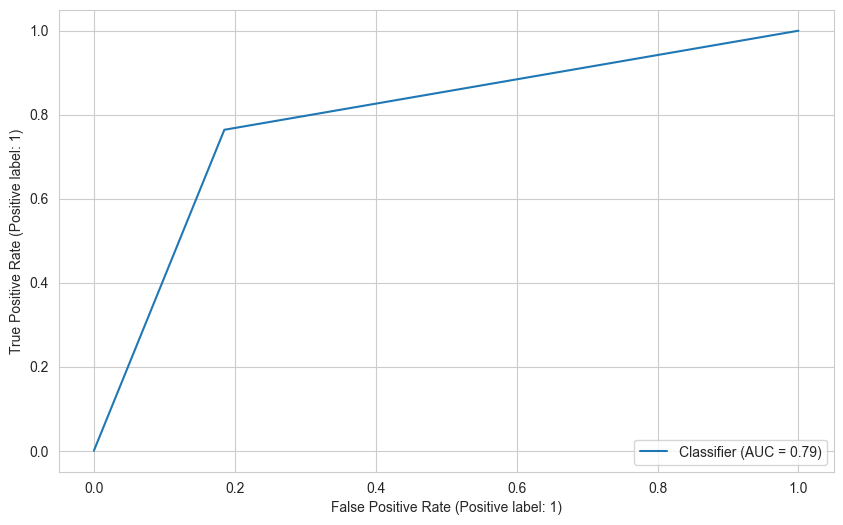

In [185]:
y_pred_proba = cat_model.predict(X_test2)
RocCurveDisplay.from_predictions(y_test2, y_pred_proba)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___